# Import librarys and data


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()


Using TensorFlow backend.


In [4]:
dataset_sym = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
dataset_sym.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X_sym = dataset_sym.drop('label',axis = 1)
y_sym = dataset_sym['label']

In [5]:
dataset_mnist = pd.read_csv("mnist/train.csv").astype('float32')
dataset_mnist.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X_mnist = dataset_mnist.drop('label',axis = 1)
y_mnist = dataset_mnist['label']

# Explore

In [6]:
y_sym.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float32

In [7]:
y_mnist.head()

0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32

In [8]:
print("shape:",X_sym.shape)
print("culoms count:",len(X_sym.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


NameError: name 'X' is not defined

In [9]:
print("shape:",X_mnist.shape)
print("culoms count:",len(X_mnist.iloc[1]))
print("784 = 28X28")

X_mnist.head()

shape: (42000, 784)
culoms count: 784
784 = 28X28


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


look at the data images

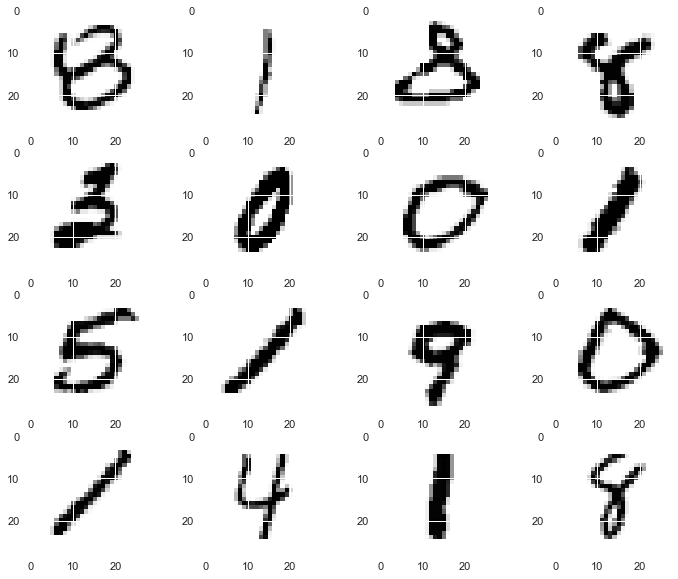

In [30]:
from sklearn.utils import shuffle

X_shuffle = shuffle(X_mnist)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [10]:
lst = []
lst.append('label')
for i in range(784):
    lst.append(i)
lst

['label',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 1

In [12]:
dataset_mnist.columns = lst
dataset_sym.columns = lst

In [37]:
dataset_sym.tail()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(dataset_mnist.iloc(1)[0])):
    dataset_mnist.iloc(1)[0][0] = 26 + dataset_mnist.iloc(1)[0][0]

In [21]:
dataset_mnist.iloc(1)[0]

0        1.0
1        0.0
2        1.0
3        4.0
4        0.0
5        0.0
6        7.0
7        3.0
8        5.0
9        3.0
10       8.0
11       9.0
12       1.0
13       3.0
14       3.0
15       1.0
16       2.0
17       0.0
18       7.0
19       5.0
20       8.0
21       6.0
22       2.0
23       0.0
24       2.0
25       3.0
26       6.0
27       9.0
28       9.0
29       7.0
        ... 
41970    2.0
41971    3.0
41972    4.0
41973    4.0
41974    3.0
41975    9.0
41976    2.0
41977    4.0
41978    4.0
41979    4.0
41980    7.0
41981    2.0
41982    8.0
41983    7.0
41984    3.0
41985    3.0
41986    0.0
41987    5.0
41988    0.0
41989    5.0
41990    3.0
41991    1.0
41992    9.0
41993    6.0
41994    4.0
41995    0.0
41996    1.0
41997    7.0
41998    6.0
41999    9.0
Name: label, Length: 42000, dtype: float32

In [22]:
dataset_mnist.iloc(1)[0] = dataset_mnist.iloc(1)[0].values + 26

In [67]:
for i in range(10):
    print(","+str(i+26)+":'"+str(i)+"'", end = "")

,26:'0',27:'1',28:'2',29:'3',30:'4',31:'5',32:'6',33:'7',34:'8',35:'9'

In [88]:
dataset_mnist.iloc(1)[0]

0        27
1         0
2         1
3         4
4         0
5         0
6         7
7         3
8         5
9         3
10        8
11        9
12        1
13        3
14        3
15        1
16        2
17        0
18        7
19        5
20        8
21        6
22        2
23        0
24        2
25        3
26        6
27        9
28        9
29        7
         ..
41970     2
41971     3
41972     4
41973     4
41974     3
41975     9
41976     2
41977     4
41978     4
41979     4
41980     7
41981     2
41982     8
41983     7
41984     3
41985     3
41986     0
41987     5
41988     0
41989     5
41990     3
41991     1
41992     9
41993     6
41994     4
41995     0
41996     1
41997     7
41998     6
41999     9
Name: label, Length: 42000, dtype: object

In [38]:
dataset = dataset_mnist.append(dataset_sym)

In [39]:
dataset.tail()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372449,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Amount of each labels


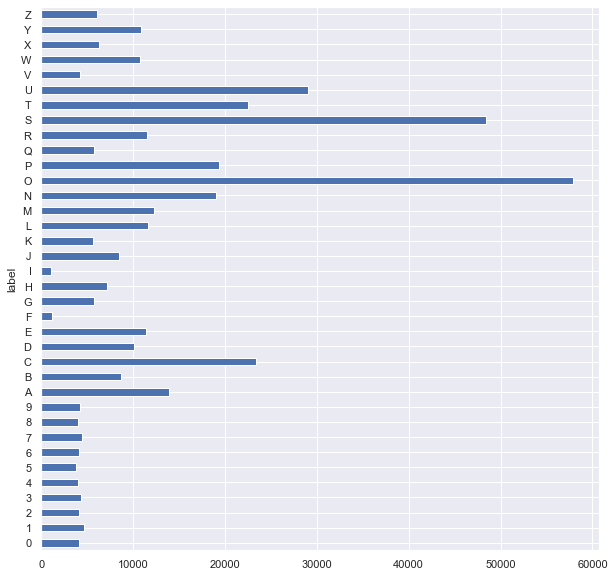

In [24]:
print("Amount of each labels")

dataset = dataset_mnist.append(dataset_sym)

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z',26:'0',27:'1',28:'2',29:'3',30:'4',31:'5',32:'6',33:'7',34:'8',35:'9'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [40]:
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [41]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y

0         27.0
1         26.0
2         27.0
3         30.0
4         26.0
5         26.0
6         33.0
7         29.0
8         31.0
9         29.0
10        34.0
11        35.0
12        27.0
13        29.0
14        29.0
15        27.0
16        28.0
17        26.0
18        33.0
19        31.0
20        34.0
21        32.0
22        28.0
23        26.0
24        28.0
25        29.0
26        32.0
27        35.0
28        35.0
29        33.0
          ... 
372420    25.0
372421    25.0
372422    25.0
372423    25.0
372424    25.0
372425    25.0
372426    25.0
372427    25.0
372428    25.0
372429    25.0
372430    25.0
372431    25.0
372432    25.0
372433    25.0
372434    25.0
372435    25.0
372436    25.0
372437    25.0
372438    25.0
372439    25.0
372440    25.0
372441    25.0
372442    25.0
372443    25.0
372444    25.0
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: label, Length: 414450, dtype: float32

# Data preparation

In [43]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


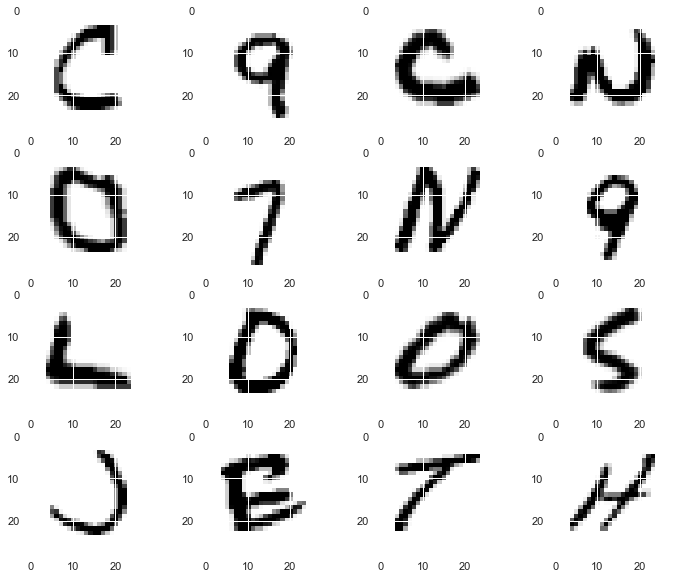

In [48]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
y_train

In [47]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Build the model


In [51]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Train on 310837 samples, validate on 103613 samples
Epoch 1/10
 - 82s - loss: 0.3046 - acc: 0.9172 - val_loss: 0.1366 - val_acc: 0.9637
Epoch 2/10
 - 91s - loss: 0.1279 - acc: 0.9643 - val_loss: 0.0991 - val_acc: 0.9732
Epoch 3/10
 - 84s - loss: 0.0995 - acc: 0.9722 - val_loss: 0.0863 - val_acc: 0.9768
Epoch 4/10
 - 81s - loss: 0.0835 - acc: 0.9761 - val_loss: 0.0777 - val_acc: 0.9788
Epoch 5/10
 - 84s - loss: 0.0719 - acc: 0.9793 - val_loss: 0.0750 - val_acc: 0.9796
Epoch 6/10
 - 81s - loss: 0.0634 - acc: 0.9815 - val_loss: 0.0678 - val_acc: 0.9816
Epoch 7/10
 - 82s - loss: 0.0566 - acc: 0.9830 - val_loss: 0.0660 - val_acc: 0.9814
Epoch 8/10
 - 85s - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0585 - val_acc: 0.9840
Epoch 9/10
 - 81s - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0579 - val_acc: 0.9844
Epoch 10/10
 - 82s - loss: 0.0424 - acc: 0.9869 - val_loss: 0.0570 - val_acc: 0.9850
CNN Score: 0.9849632768088946


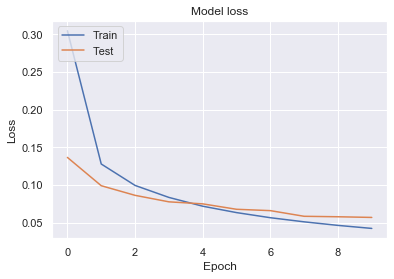

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [99]:
for p in enumerate(cls.predict(proba)[0]):
    print(alphabets_mapper[p[0]] + " " + str('{0:.10f}'.format(p[1])))

A 0.0000000000
B 0.0000000000
C 0.0000000000
D 0.0000000000
E 0.0000000000
F 0.0000000000
G 0.0000000000
H 0.0000000000
I 0.0000000000
J 0.0000000000
K 0.0000000000
L 0.0000000000
M 0.9999996424
N 0.0000003223
O 0.0000000000
P 0.0000000000
Q 0.0000000000
R 0.0000000000
S 0.0000000000
T 0.0000000000
U 0.0000000000
V 0.0000000000
W 0.0000000020
X 0.0000000000
Y 0.0000000000
Z 0.0000000000
0 0.0000000000
1 0.0000000000
2 0.0000000000
3 0.0000000000
4 0.0000000000
5 0.0000000000
6 0.0000000000
7 0.0000000000
8 0.0000000000
9 0.0000000000


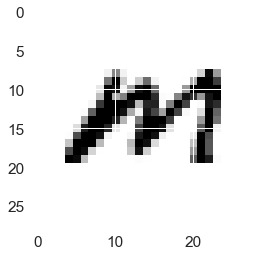

In [102]:
plt.imshow(proba.reshape(28,28), cmap="Greys")

In [78]:
proba = X_test[0].reshape(1,28,28,1)

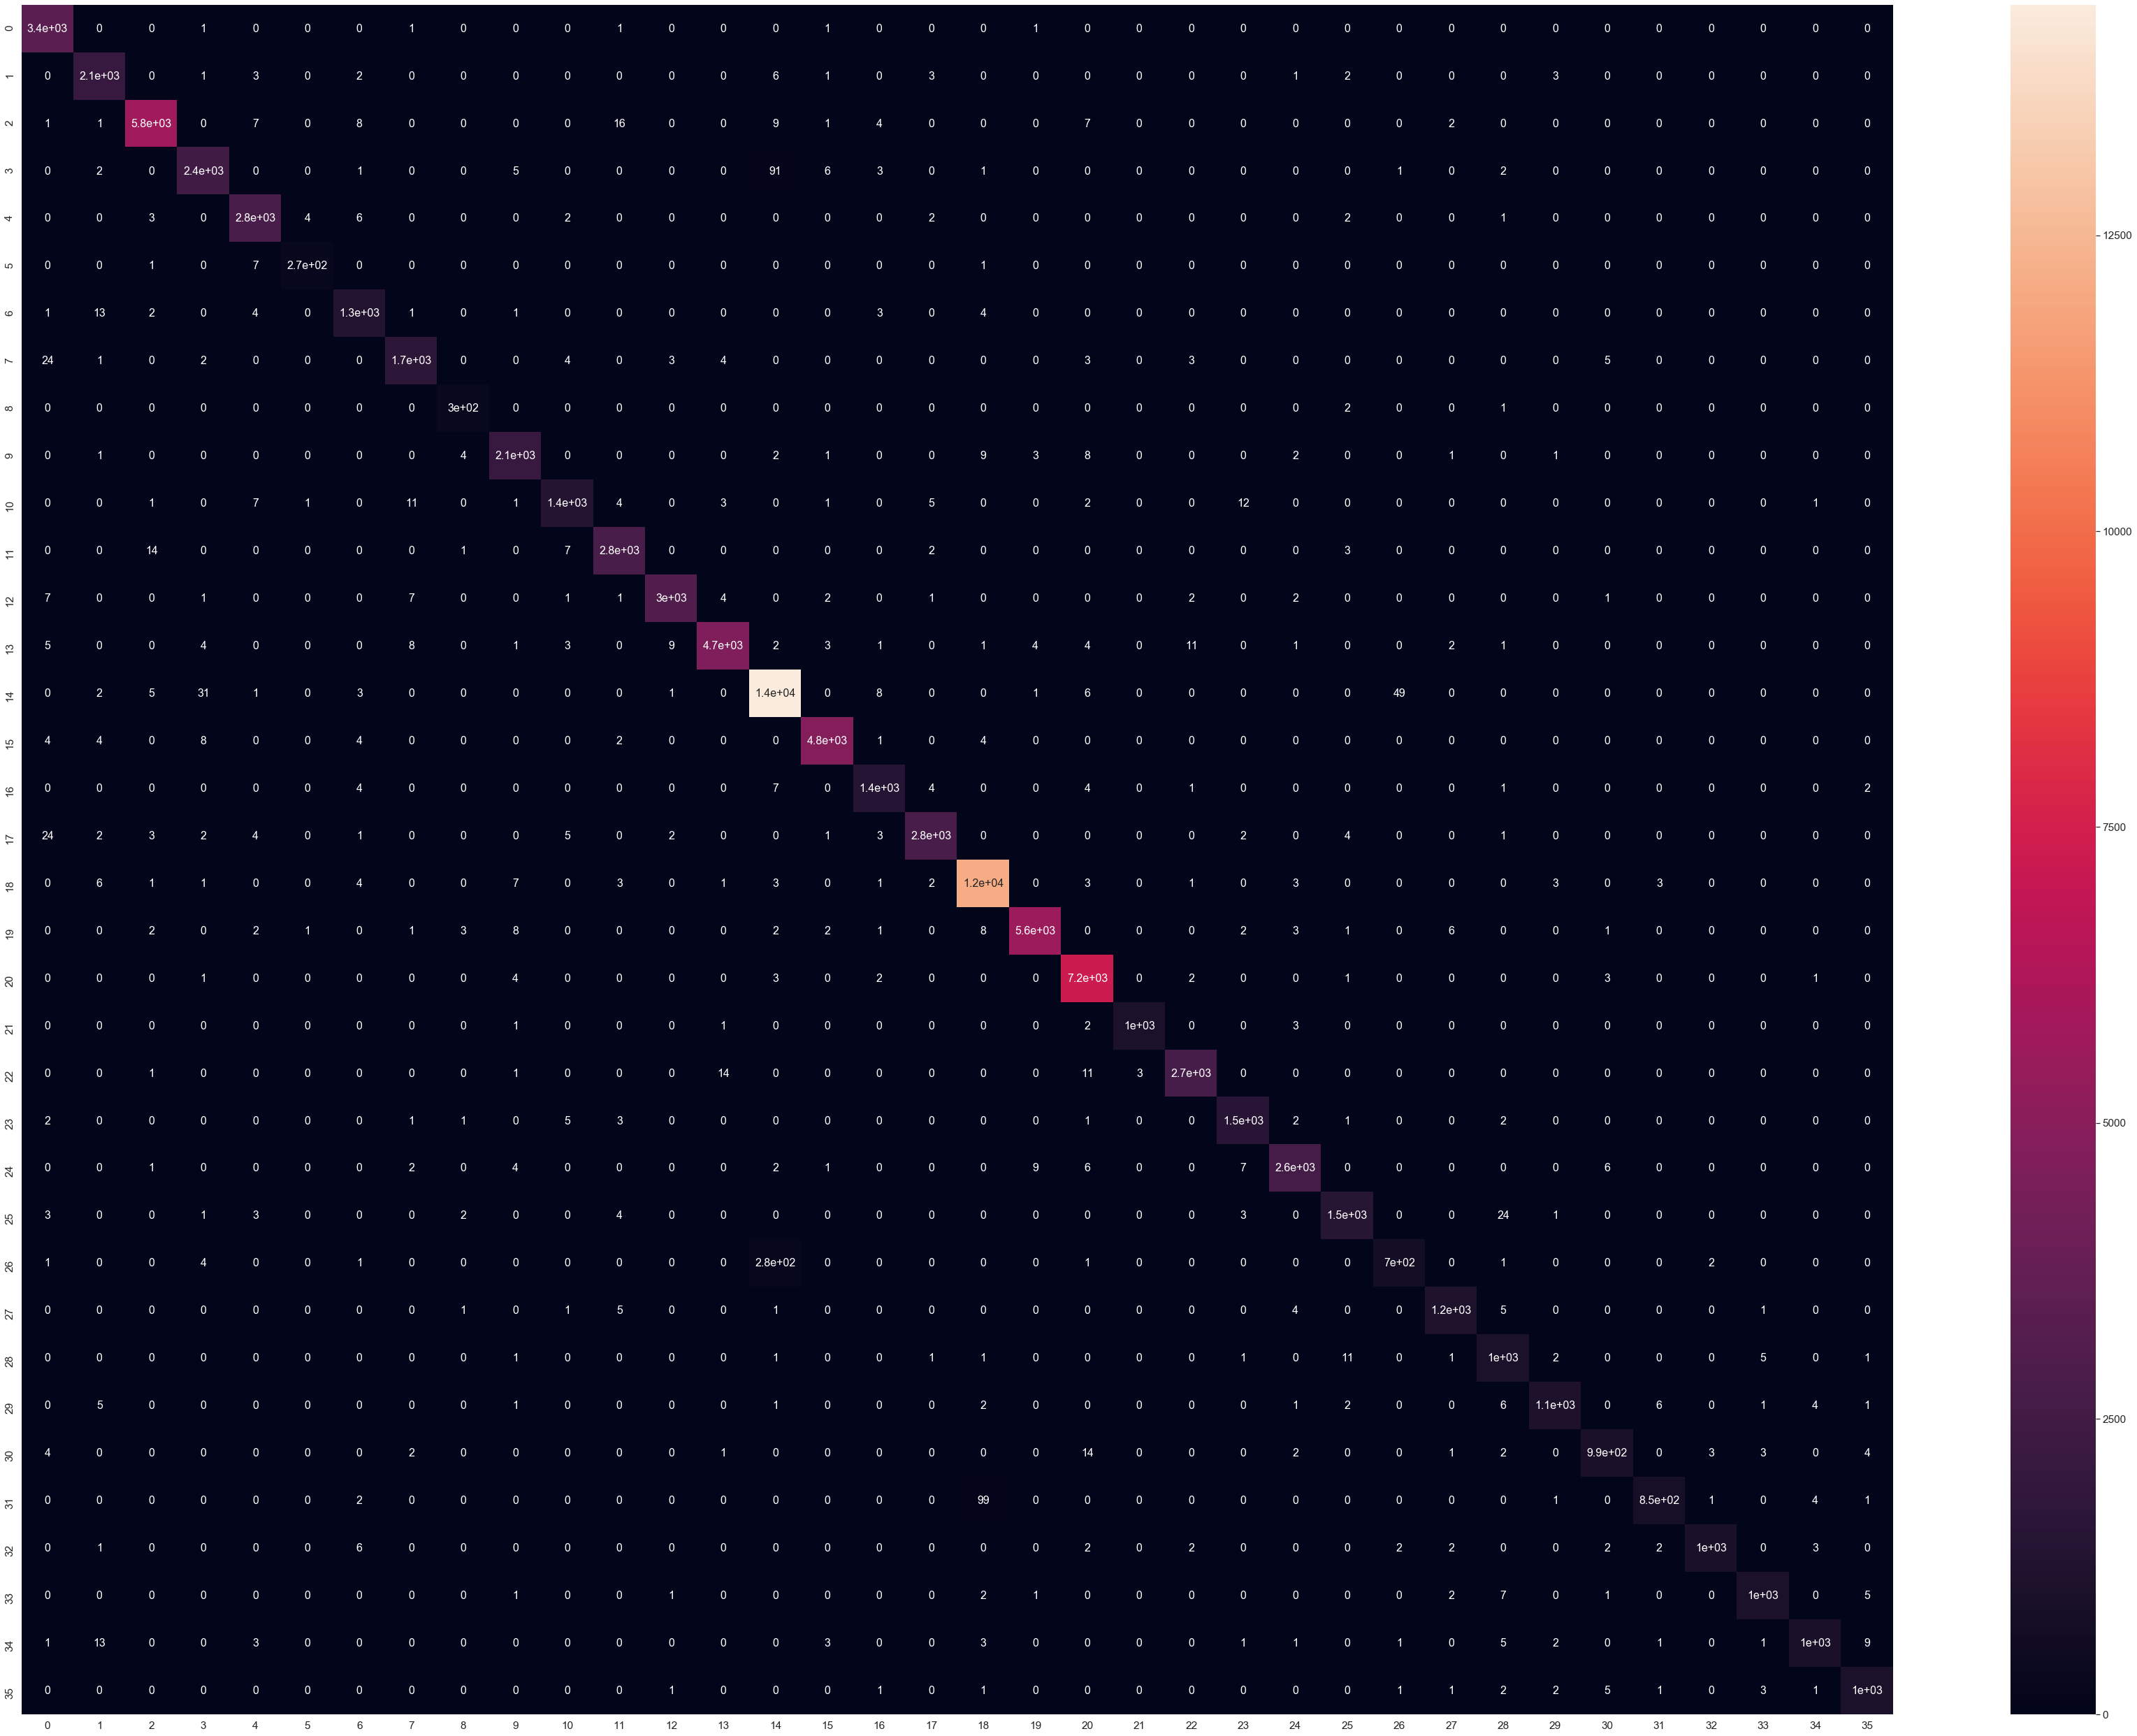

In [56]:
cm=confusion_matrix(y_test.argmax(axis=1),cls.predict(X_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, range(36),
                  range(36))
plt.figure(figsize = (60,45))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [14]:
!pip install --upgrade --user pip
!pip install -U coremltools
import coremltools

cls.save('my_model.h5')

output_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
core_ml=coremltools.converters.keras.convert('my_model.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels,image_scale=1/255.0, is_bgr = False, image_input_names = "image")
core_ml.save('coreml_model.mlmodel')

Requirement already up-to-date: pip in c:\users\ruca\anaconda3\lib\site-packages (20.0.1)


ERROR: Could not find a version that satisfies the requirement coremltools (from versions: none)
ERROR: No matching distribution found for coremltools


ModuleNotFoundError: No module named 'coremltools'

In [104]:
cls.save('sym_and_mnist_0.9849.h5')